In [157]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from tqdm import tqdm
import pickle
import numpy as np

In [158]:
def access_MLIT_website(_id):
    url=f"http://www1.river.go.jp/cgi-bin/SiteInfo.exe?ID={_id}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    info_list=soup.find_all("tr")
    return info_list

def exsistance_checker(info_list):
    if len(info_list)>0:
        return True
    else:
        False

def find(info_list):
    for info_name in info_list:
        info_name_str=str(info_name)
        print(re.findall('<td width="150">(.*)</td>', info_name_str))

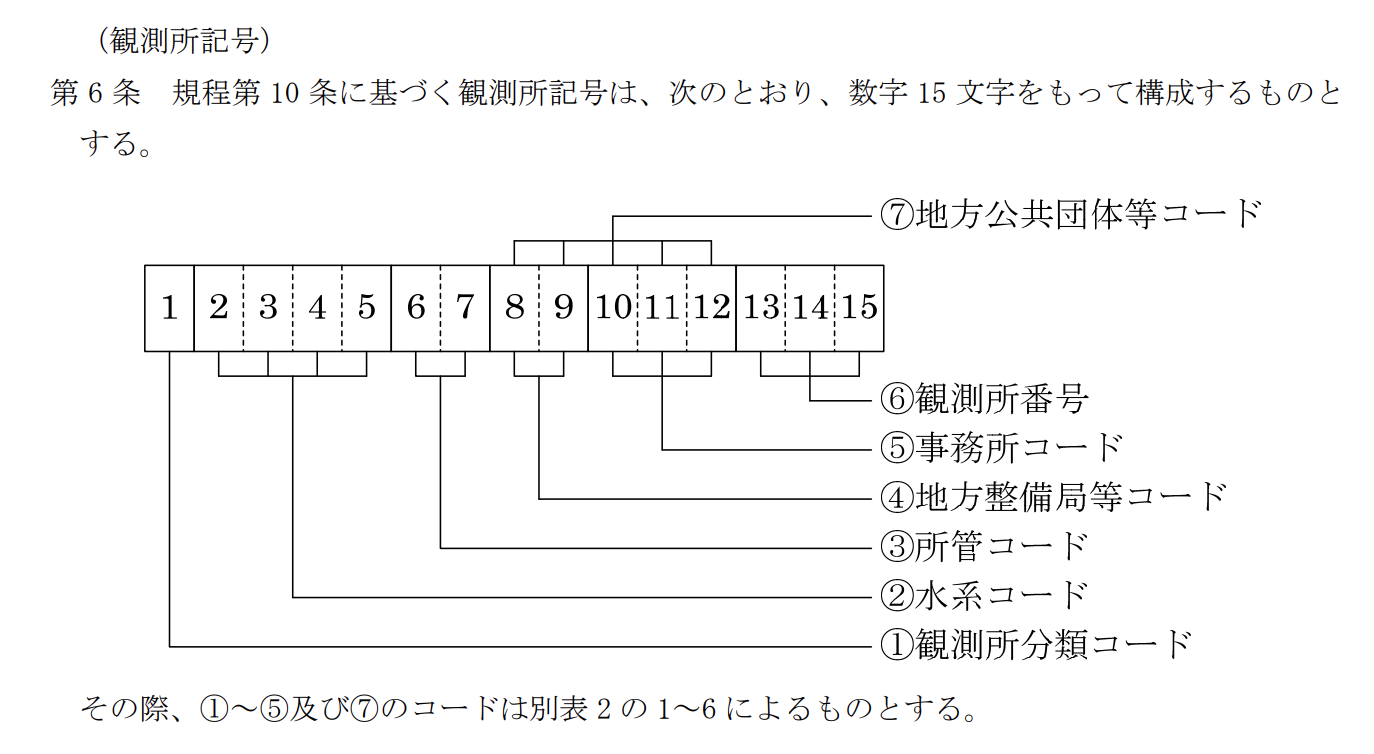

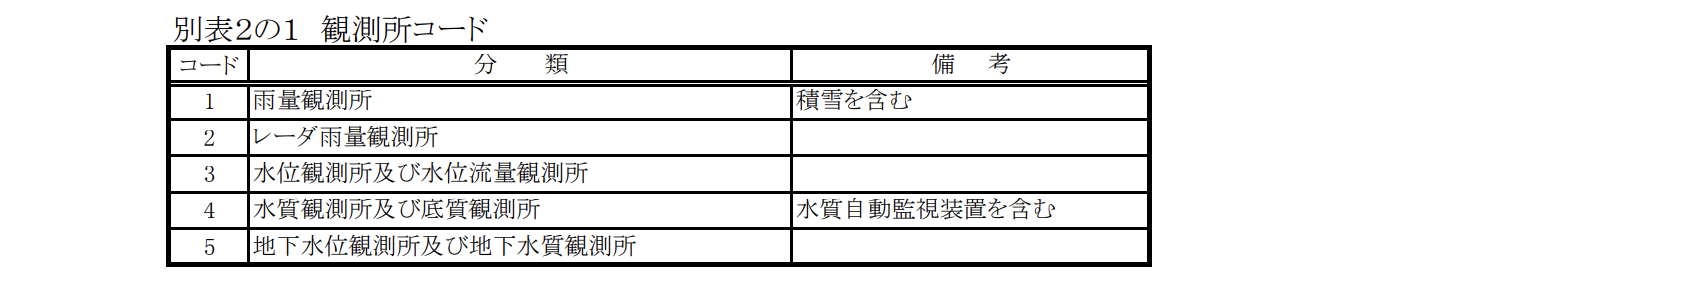

In [114]:
station_class_code_list=[str(i) for i in range(1,6)]

basin_code_raw=pd.read_csv("basin_code_list.csv",header=None).values[0,0]
basin_code_list=basin_code_raw.split(" ")
basin_code_list.sort()

jurisdiction_code_list=["12","14","19"]

station_number_code_list=["{0:03d}".format(i) for i in range(0,1000,10)]

In [115]:
jimusyo_code_raw_list=pd.read_csv("事務所.csv",header=None).values[:,0]

jimusyo_code_list=[]
for jimusyo_code_raw in jimusyo_code_raw_list:
    jimusyo_code_list.append(jimusyo_code_raw.split(" "))
jimusyo_code_list_=[]
for i in jimusyo_code_list:
    for j in i:
        jimusyo_code_list_.append(j)

jimusyo_code_list_chosen=[]
for i in jimusyo_code_list_:
    try:
        int(i)
        jimusyo_code_list_chosen.append(i)
    except:
        pass

jimusyo_code_list_chosen.sort()


In [116]:
local_bureau_code_list=["{0:02d}".format(i) for i in range(81,91)]+["98","99"]

In [117]:
area_list=["北海道","東北","関東","北陸","中部","近畿","中国","四国","九州"]

In [118]:
area_base_code_dict={i:{"水系":[],"地方整備局":[],"事務所":[],} for i in area_list}

In [119]:
for i in basin_code_list:
    if i[:2]=="01":
        area_base_code_dict["北海道"]["水系"].append(i)
    elif i[:2]=="02":
        area_base_code_dict["東北"]["水系"].append(i)
    elif i[:2]=="03":
        area_base_code_dict["関東"]["水系"].append(i)
    elif i[:2]=="04":
        area_base_code_dict["北陸"]["水系"].append(i)
    elif i[:2]=="05":
        area_base_code_dict["中部"]["水系"].append(i)
    elif i[:2]=="06":
        area_base_code_dict["近畿"]["水系"].append(i)
    elif i[:2]=="07":
        area_base_code_dict["中国"]["水系"].append(i)
    elif i[:2]=="08":
        area_base_code_dict["四国"]["水系"].append(i)
    elif i[:2]=="09":
        area_base_code_dict["九州"]["水系"].append(i)


In [120]:
for i in local_bureau_code_list:
    if i=="81":
        area_base_code_dict["北海道"]["地方整備局"].append(i)
    elif i=="82":
        area_base_code_dict["東北"]["地方整備局"].append(i)
    elif i=="83":
        area_base_code_dict["関東"]["地方整備局"].append(i)
    elif i=="84":
        area_base_code_dict["北陸"]["地方整備局"].append(i)
    elif i=="85":
        area_base_code_dict["中部"]["地方整備局"].append(i)
    elif i=="86":
        area_base_code_dict["近畿"]["地方整備局"].append(i)
    elif i=="87":
        area_base_code_dict["中国"]["地方整備局"].append(i)
    elif i=="88":
        area_base_code_dict["四国"]["地方整備局"].append(i)
    elif i=="89":
        area_base_code_dict["九州"]["地方整備局"].append(i)    

In [121]:
for i in jimusyo_code_list_chosen:
    if i[0]=="1":
        area_base_code_dict["北海道"]["事務所"].append(i)
    elif i[0]=="2":
        area_base_code_dict["東北"]["事務所"].append(i)
    elif i[0]=="3":
        area_base_code_dict["関東"]["事務所"].append(i)
    elif i[0]=="4":
        area_base_code_dict["北陸"]["事務所"].append(i)
    elif i[0]=="5":
        area_base_code_dict["中部"]["事務所"].append(i)
    elif i[0]=="6":
        area_base_code_dict["近畿"]["事務所"].append(i)
    elif i[0]=="7":
        area_base_code_dict["中国"]["事務所"].append(i)
    elif i[0]=="8":
        area_base_code_dict["四国"]["事務所"].append(i)
    elif i[0]=="9":
        area_base_code_dict["九州"]["事務所"].append(i)


In [168]:
df=pickle.load(open(f"df_rain_level_flow.pkl","rb"))
df["緯度_座標"]=np.nan
df["経度_座標"]=np.nan
df_gauge=df[df.観測項目=="雨量"]

In [169]:
def convert_latitude_to_coordinate(x):
#     print(x)
    if x=="<br/>":
        return np.nan
    else:
        lat_d,lat_m,lat_s=get_latitude(x)
        lat=lat_d+lat_m/60+lat_s/3600
        return lat

def convert_longitude_to_coordinate(x):
#     print(x)
    if x=="<br/>":
        return np.nan
    else:
        lon_d,lon_m,lon_s=get_longitude(x)
        lon=lon_d+lon_m/60+lon_s/3600
        return lon

def get_latitude(x):
    hokui=re.findall('北緯 (.*) 東経', x)[0]
    hokui_degree=int(re.findall('(.*)度', hokui)[0])
    hokui_minute=int(re.findall('度(.*)分', hokui)[0])
    hokui_second=int(re.findall('分(.*)秒', hokui)[0])
    return hokui_degree,hokui_minute,hokui_second

def get_longitude(x):
    toukei=re.findall('東経 (.*)', x)[0]
    toukei_degree=int(re.findall('(.*)度', toukei)[0])
    toukei_minute=int(re.findall('度(.*)分', toukei)[0])
    toukei_second=int(re.findall('分(.*)秒', toukei)[0])
    return toukei_degree,toukei_minute,toukei_second

In [170]:
df_gauge["緯度_座標"]=df_gauge.緯度経度.apply(convert_latitude_to_coordinate)
df_gauge["経度_座標"]=df_gauge.緯度経度.apply(convert_longitude_to_coordinate)
df_gauge=df_gauge.dropna()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
df_gauge.head()

観測所名 観測項目            観測所記号  水系名  河川名            所在地  \
0      誉平（ぽんぴら）   雨量  101011281104010  天塩川  天塩川   北海道中川郡中川町字中川   
1        佐久（さく）   雨量  101011281104020  天塩川  天塩川   北海道中川郡中川町字佐久   
2  音威子府（おといねっぷ）   雨量  101011281104030  天塩川  天塩川    北海道中川郡音威子府村   
3    恩根内（おんねない）   雨量  101011281104040  天塩川  天塩川  北海道中川郡美深町字恩根内   
4   小車岳（おぐるまだけ）   雨量  101011281104050  天塩川  天塩川   北海道中川郡美深町字小車   

                         緯度経度      緯度_座標       経度_座標  
0  北緯 44度48分33秒 東経 142度04分17秒  44.809167  142.071389  
1  北緯 44度44分31秒 東経 142度02分47秒  44.741944  142.046389  
2  北緯 44度43分15秒 東経 142度15分34秒  44.720833  142.259444  
3  北緯 44度35分30秒 東経 142度18分05秒  44.591667  142.301389  
4  北緯 44度35分32秒 東経 142度11分04秒  44.592222  142.184444

In [172]:
import folium

In [176]:
df_gauge_name_list=df_gauge.観測所名.tolist()
df_gauge_lat_list=df_gauge.緯度_座標.tolist()
df_gauge_lon_list=df_gauge.経度_座標.tolist()

In [177]:
MAP = folium.Map(
    location=[office_lat, office_lng], 
    zoom_start=6,
    tiles="Stamen Terrain"
)
for idx in range(len(df_gauge)):
    _name=df_gauge_name_list[idx]
    _lat=df_gauge_lat_list[idx]
    _lon=df_gauge_lon_list[idx]
    folium.Marker([_lat, _lon], popup=_name).add_to(MAP)
MAP

In [209]:
df_2=pickle.load(open(f"df_rain_level_flow_2-Copy1.pkl","rb"))
df_2["緯度_座標"]=df_2.緯度経度.apply(convert_latitude_to_coordinate)
df_2["経度_座標"]=df_2.緯度経度.apply(convert_longitude_to_coordinate)
df_2=df_2.dropna()

df_2_name_list=df_2.観測所名.tolist()
df_2_lat_list=df_2.緯度_座標.tolist()
df_2_lon_list=df_2.経度_座標.tolist()

In [210]:
MAP = folium.Map(
    location=[office_lat, office_lng], 
    zoom_start=6,
    tiles="Stamen Terrain"
)
for idx in range(len(df_2)):
    _name=df_2_name_list[idx]
    _lat=df_2_lat_list[idx]
    _lon=df_2_lon_list[idx]
    folium.Marker([_lat, _lon], popup=_name).add_to(MAP)
MAP

In [189]:
from lifelines.datasets import load_rossi
from lifelines import KaplanMeierFitter

rossi=load_rossi()

<AxesSubplot:xlabel='timeline'>

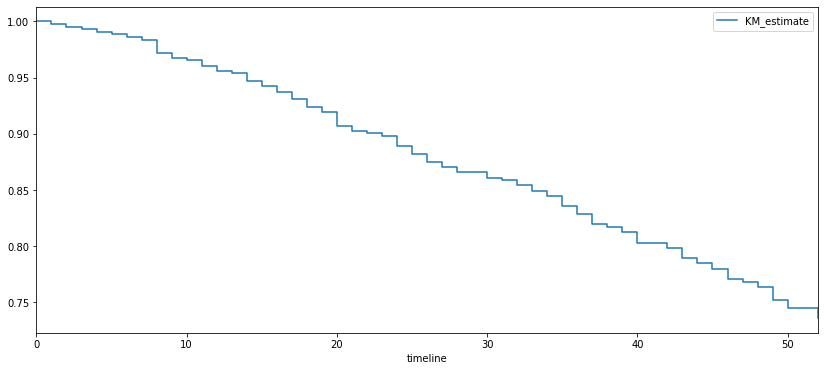

In [193]:
kmf=KaplanMeierFitter()
T=rossi["week"]
E=rossi["arrest"]
kmf.fit(T,event_observed=E)
kmf.plot(figsize=(14,6),ci_show=False)

In [192]:
rossi

week  arrest  fin  age  race  wexp  mar  paro  prio
0      20       1    0   27     1     0    0     1     3
1      17       1    0   18     1     0    0     1     8
2      25       1    0   19     0     1    0     1    13
3      52       0    1   23     1     1    1     1     1
4      52       0    0   19     0     1    0     1     3
5      52       0    0   24     1     1    0     0     2
6      23       1    0   25     1     1    1     1     0
7      52       0    1   21     1     1    0     1     4
8      52       0    0   22     1     0    0     0     6
9      52       0    0   20     1     1    0     0     0
10     52       0    1   26     1     0    0     1     3
11     52       0    0   40     1     1    0     0     2
12     37       1    0   17     1     1    0     1     5
13     52       0    0   37     1     1    0     0     2
14     25       1    0   20     1     0    0     1     3
15     46       1    1   22     1     1    0     1     2
16     28       1    0   19     1     0    0     0     7
17     52       0    0   20     1     0    0     0     2
18     52       0    0   25     1     0    0     1    12
19     52       0    0   24     0     1    0     1     1
20     52       0    0   23     1     0    0     1     4
21     52       0    1   44     1     1    1     1     0
22     24       1    1   29     1     1    0     1     2
23     52       0    1   28     0     1    0     1     1
24     52       0    1   21     1     1    0     0     0
25     52       0    1   19     1     1    0     1     2
26     52       0    0   33     1     1    0     1     1
27     52       0    0   19     1     0    0     0     2
28     52       0    1   19     1     0    0     1     3
29     52       0    1   23     1     1    1     1     9
..    ...     ...  ...  ...   ...   ...  ...   ...   ...
402    52       0    0   23     1     0    0     0     5
403    52       0    0   23     1     1    0     1     1
404    52       0    0   23     1     1    1     1     2
405    35       1    0   20     1     1    0     1     4
406    52       0    1   26     1     1    1     0     4
407    52       0    1   30     1     0    0     0     1
408    52       0    1   36     0     1    0     0     4
409    52       0    1   43     1     1    0     0     4
410    27       1    0   20     0     1    0     0     1
411    52       0    1   24     1     1    0     1     1
412    52       0    0   22     1     1    0     0     1
413    52       0    1   20     1     0    1     0     1
414    52       1    0   21     1     0    0     0     0
415    45       1    1   18     1     0    0     0     5
416     4       1    0   18     1     1    0     0     1
417    52       1    0   33     1     1    0     1     2
418    36       1    1   19     1     0    0     1     2
419    52       0    1   21     0     1    0     1     1
420    52       0    1   21     1     0    0     1     1
421     8       1    1   21     1     1    0     1     4
422    15       1    1   22     1     0    0     1     3
423    52       0    0   18     1     0    0     1     3
424    19       1    0   18     1     0    0     0     2
425    52       0    0   24     1     1    0     1     2
426    12       1    1   22     1     1    1     1     2
427    52       0    1   31     0     1    0     1     3
428    52       0    0   20     1     0    0     1     1
429    52       0    1   20     1     1    1     1     1
430    52       0    0   29     1     1    0     1     3
431    52       0    1   24     1     1    0     1     1

[432 rows x 9 columns]

In [203]:
rossi_race1=rossi[rossi.arrest==1]

NameError: name 'plt' is not defined

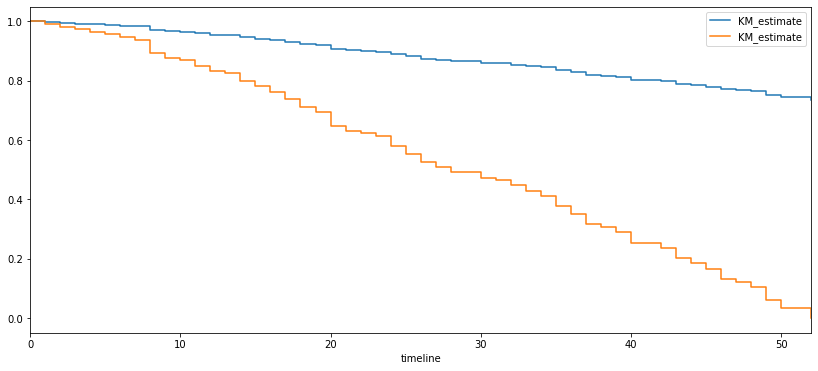

In [206]:
kmf_race1=KaplanMeierFitter()
T_race1=rossi_race1["week"]
E_race1=rossi_race1["arrest"]
kmf_race1.fit(T_race1,event_observed=E_race1)
kmf.plot(figsize=(14,6),ci_show=False,legend=False)
kmf_race1.plot(figsize=(14,6),ci_show=False,legend=False)